/Users/edsonodake/miniforge3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


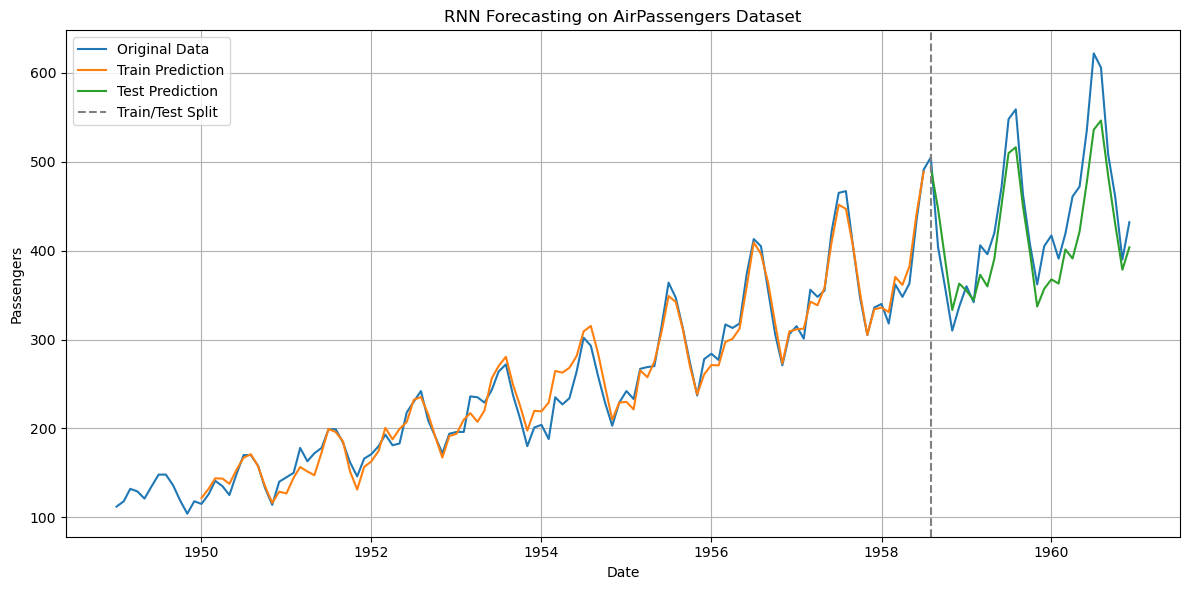

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load and preprocess the data
df = pd.read_csv('airplane-passengers.csv')
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(df[['Passengers']])

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Set sequence length and create train-test split
seq_length = 12
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size - seq_length:]

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Invert scaling
train_pred_inv = scaler.inverse_transform(train_pred)
y_train_inv = scaler.inverse_transform(y_train)
test_pred_inv = scaler.inverse_transform(test_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Prepare time index
train_dates = df.index[seq_length:train_size]
test_dates = df.index[train_size:]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Original Data')
plt.plot(train_dates, train_pred_inv.flatten(), label='Train Prediction')
plt.plot(test_dates, test_pred_inv.flatten(), label='Test Prediction')
plt.axvline(df.index[train_size], color='gray', linestyle='--', label='Train/Test Split')
plt.title('RNN Forecasting on AirPassengers Dataset')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/edsonodake/miniforge3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


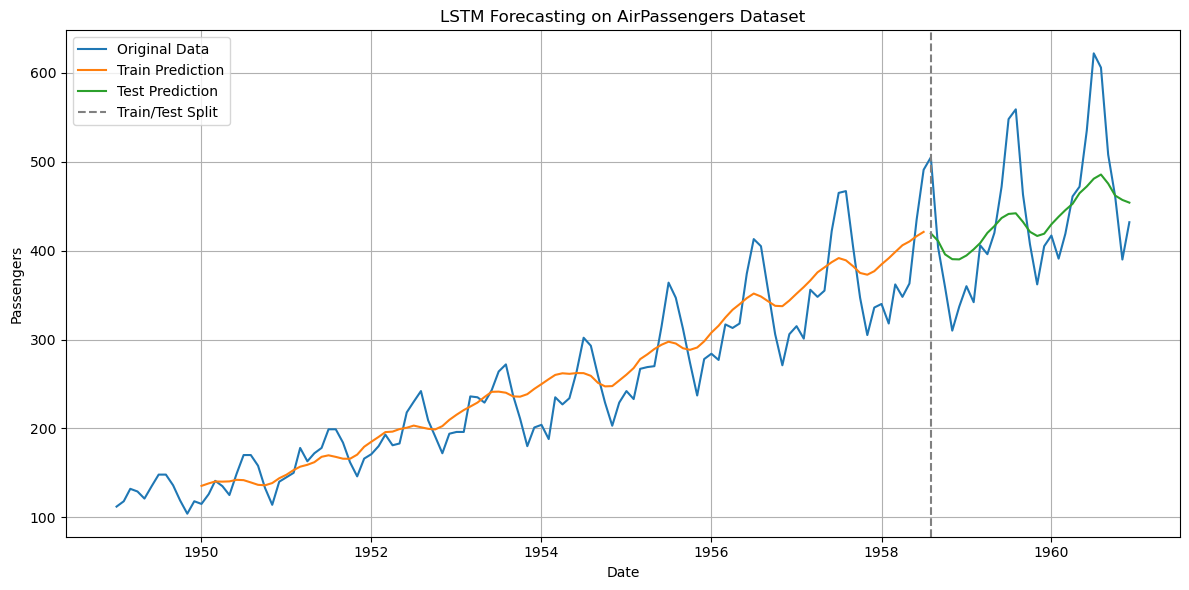

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess the data
df = pd.read_csv('airplane-passengers.csv')
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(df[['Passengers']])

# Create input-output sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Parameters
seq_length = 12
train_size = int(len(data) * 0.8)

train_data = data[:train_size]
test_data = data[train_size - seq_length:]

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Invert scaling
train_pred_inv = scaler.inverse_transform(train_pred)
y_train_inv = scaler.inverse_transform(y_train)
test_pred_inv = scaler.inverse_transform(test_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Time index
train_dates = df.index[seq_length:train_size]
test_dates = df.index[train_size:]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Original Data')
plt.plot(train_dates, train_pred_inv.flatten(), label='Train Prediction')
plt.plot(test_dates, test_pred_inv.flatten(), label='Test Prediction')
plt.axvline(df.index[train_size], color='gray', linestyle='--', label='Train/Test Split')
plt.title('LSTM Forecasting on AirPassengers Dataset')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/edsonodake/miniforge3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x314a588b0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


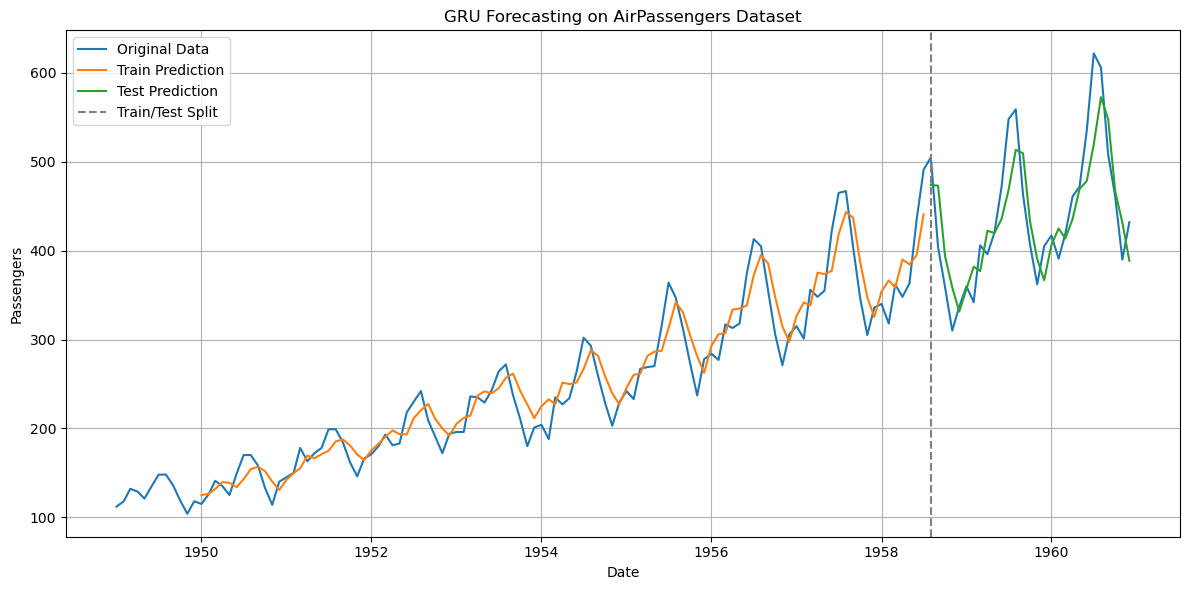

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Load and preprocess the data
df = pd.read_csv('airplane-passengers.csv')
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(df[['Passengers']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length and train-test split
seq_length = 12
train_size = int(len(data) * 0.8)

train_data = data[:train_size]
test_data = data[train_size - seq_length:]

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build GRU model
model = Sequential([
    GRU(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

# Predict
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Invert scaling
train_pred_inv = scaler.inverse_transform(train_pred)
y_train_inv = scaler.inverse_transform(y_train)
test_pred_inv = scaler.inverse_transform(test_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Time indices
train_dates = df.index[seq_length:train_size]
test_dates = df.index[train_size:]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Original Data')
plt.plot(train_dates, train_pred_inv.flatten(), label='Train Prediction')
plt.plot(test_dates, test_pred_inv.flatten(), label='Test Prediction')
plt.axvline(df.index[train_size], color='gray', linestyle='--', label='Train/Test Split')
plt.title('GRU Forecasting on AirPassengers Dataset')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


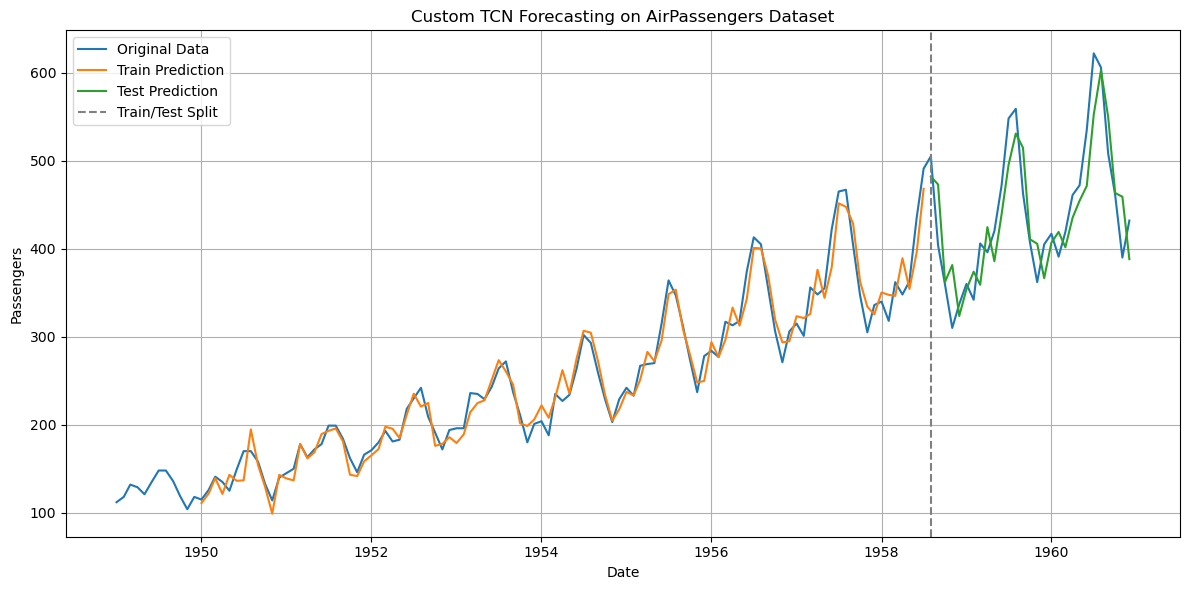

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Input, Add, Activation, LayerNormalization, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess the data
df = pd.read_csv('airplane-passengers.csv')
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(df[['Passengers']])

# Create input-output sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Parameters
seq_length = 12
train_size = int(len(data) * 0.8)

train_data = data[:train_size]
test_data = data[train_size - seq_length:]

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build custom TCN model
def build_custom_tcn(input_shape, filters=64, kernel_size=3, dilations=[1, 2, 4, 8]):
    inputs = Input(shape=input_shape)
    x = inputs
    for dilation_rate in dilations:
        shortcut = x
        x = Conv1D(filters, kernel_size, padding='causal', dilation_rate=dilation_rate)(x)
        x = LayerNormalization()(x)
        x = Activation('relu')(x)
        x = Add()([shortcut, x])  # Residual connection
    x = Dense(1)(x[:, -1, :])  # Output only from last time step
    return Model(inputs, x)

# Compile and train
model = build_custom_tcn((seq_length, 1))
model.compile(optimizer=Adam(), loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

# Predict
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Invert scaling
train_pred_inv = scaler.inverse_transform(train_pred)
y_train_inv = scaler.inverse_transform(y_train)
test_pred_inv = scaler.inverse_transform(test_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Time indices
train_dates = df.index[seq_length:train_size]
test_dates = df.index[train_size:]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Original Data')
plt.plot(train_dates, train_pred_inv.flatten(), label='Train Prediction')
plt.plot(test_dates, test_pred_inv.flatten(), label='Test Prediction')
plt.axvline(df.index[train_size], color='gray', linestyle='--', label='Train/Test Split')
plt.title('Custom TCN Forecasting on AirPassengers Dataset')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 📈 Time Series Forecasting: Model Comparison and Confidence Interval Explanation

## 🔍 Dataset
We used the **AirPassengers** dataset, which contains monthly totals of airline passengers from 1949 to 1960. This is a classic univariate time series problem, characterized by a strong upward trend and seasonality.

---

## 🧠 Models Trained

### 1. **Simple RNN**
- A basic Recurrent Neural Network.
- Uses hidden states to pass temporal information forward through time.
- **Limitation**: Tends to forget long-term patterns and struggles with vanishing gradients.

### 2. **LSTM (Long Short-Term Memory)**
- Enhances RNNs with **memory cells and gates** to retain long-term information.
- Good at learning **seasonality** and long-term dependencies.
- Requires more computation and tuning.

### 3. **GRU (Gated Recurrent Unit)**
- A simpler version of LSTM with fewer gates.
- Faster to train while still retaining memory of long-term patterns.
- Often performs comparably to LSTM on time series.

### 4. **TCN (Temporal Convolutional Network)**
- Uses **1D causal convolutions** instead of recurrence.
- Features **dilated convolutions** to learn long-term patterns.
- Trains **faster** and more **stable** than RNN-based models.
- Better suited for **parallel processing**.
- We extended this with **Dropout + Monte Carlo sampling** to estimate prediction **uncertainty**.

### 5. **Transformer**
- A self-attention-based architecture.
- Models relationships between time steps regardless of their position.
- **Overkill for small univariate series**, often underperforms on datasets like AirPassengers without additional tricks (like pretraining or more data).

---

## 📊 Confidence Intervals (CI) with TCN

We used **Monte Carlo Dropout** to estimate the model's predictive uncertainty:

1. **Dropout layers** were kept active during prediction (`training=True`).
2. We made **100 forward passes** through the TCN model on the test data.
3. For each time step, we computed:
   - **Mean prediction**
   - **2.5% percentile (lower bound)**
   - **97.5% percentile (upper bound)**

This gave us a **95% confidence interval** for the forecasted values.

### 🔧 Why It Matters
- Confidence intervals help us understand the **uncertainty** in our predictions.
- Useful in real-world scenarios where decisions based on forecasts carry risk.
- Especially valuable in time series with **noise**, **seasonality**, or when making **long-term forecasts**.

---

## ✅ Summary Table

| Model       | Strengths                          | Weaknesses                         | Notes                                    |
|-------------|------------------------------------|-------------------------------------|------------------------------------------|
| RNN         | Simple, fast                       | Poor long-term memory               | Not ideal for strong seasonality         |
| LSTM        | Learns long-term dependencies      | Slower training                     | Good general-purpose sequence model      |
| GRU         | Lighter than LSTM                  | May miss complex patterns           | Best for medium-term memory              |
| TCN         | Fast, parallel, stable gradients   | Requires fixed input size           | Great for univariate time series         |
| Transformer | Flexible, attention-based          | Needs large data + tuning           | Underperforms on small univariate data   |
| TCN + CI    | Adds uncertainty estimates         | More compute at inference           | Ideal for risk-aware forecasting         |

---
